In [1]:
cd ..

/Users/dorislee/Desktop/Research/vizdatasci/datasci-api


In [2]:
%load_ext autoreload
%autoreload 2
from dataset.Dataset import Dataset
from dataObj.dataObj import DataObj
from dataObj.Column import Column
from dataObj.Row import Row

This is basically a similar implementation to `enforceSpecifiedChannel` and what we have for default is `setShowMeSpecifiedChannel`

- The way that I did it for `enforceSpecifiedChannel` is not the best way to approach this because it already assumes a set of showMeChannels is determined. But in our case we want to determine this within the showMe function

- The core logic was essentially: 
    - start a empty dict : specifiedChannel ={} 
    - for each channel, if the channel is not specified, then use the showMe defaults.
    - But this does not account for the swap logic, which I think is accounted for by the UI in frontier. 
    - The swap logic is essentially, if I specify x is something but no specify what y is, then we can infer y is whatever field is leftover. In the UI we never have unspecified fields, so replacement based strategy is fine.


In [92]:
dataset = Dataset("data/cars.csv",schema=[{"Year":{"dataType":"date"}}])
dobj = DataObj(dataset,[Column("MilesPerGal", channel="y"),Column("Weight")])

{'x': Column <MilesPerGal,channel:x,dataType:quantitative,dataModel:measure>, 'y': Column <Weight,channel:y,dataType:quantitative,dataModel:measure>}
y
{'x': Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, 'y': Column <Weight,channel:x,dataType:quantitative,dataModel:measure>}


In [41]:
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [42]:
dobj.compiled

<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, Column <Weight,channel:x,dataType:quantitative,dataModel:measure>]>

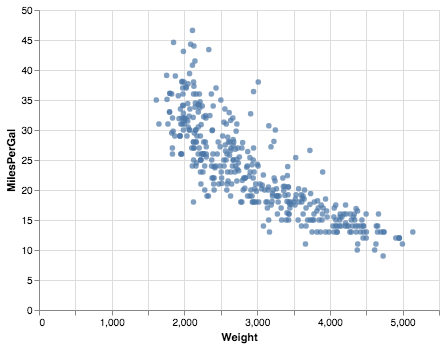

In [43]:
dobj.singleDisplay()

In [122]:
# autoChannel = {"x": Column("MilesPerGal", channel="y"),
#                 "y":Column("Weight")}
autoChannel = {"x": dobj.spec[0],
                "y":dobj.spec[1]}

In [129]:
def enforceSpecifiedChannel(dobj, autoChannel):
    available_channels = list(autoChannel.keys()) 
    # create a dictionary of specified channels in the given dobj
    specifiedDict = {} # specifiedDict={"x":[],"y":[list of Dobj with y specified as channel]}
    for val in available_channels:
        specifiedDict[val]=dobj.getObjFromChannel(val)
    
    # for every specified element, swap with channel that originally contained that element in the autoChannel
    for sVal,sAttr in specifiedDict.items():
        if (len(sAttr)==1): #if specified in dobj
            # remove the specified channel from available channels
            if (len(available_channels)>0):
                available_channels.remove(sVal)
                swapWithChannel = available_channels[0]
                autoChannel[sVal].channel = swapWithChannel
                available_channels.remove(swapWithChannel)
        elif (len(sAttr)>1):
            raise ValueError("There should not be more than one attribute specified in the same channel.")
        elif (len(sAttr)==0): # if unspecified, then populate the channel value with the showMe default
            autoChannel[sVal].channel = sVal
    dobj.spec = list(autoChannel.values())
    return dobj

In [126]:
specifiedDict

{'x': [Column <Weight,channel:x,dataType:,dataModel:>], 'y': []}

In [128]:
for sVal,sAttr in specifiedDict.items():
    if (len(sAttr)==1): #if specified in dobj
        # remove the specified channel from available channels
        if (len(available_channels)>0):
            available_channels.remove(sVal)
            swapWithChannel = available_channels[0]
            autoChannel[sVal].channel = swapWithChannel
            available_channels.remove(swapWithChannel)
    elif (len(sAttr)>1):
        raise ValueError("There should not be more than one attribute specified in the same channel.")
    elif (len(sAttr)==0): # if unspecified, then populate the channel value with the showMe default
        autoChannel[sVal].channel = sVal

In [113]:
dobj.spec = list(autoChannel.values())

In [114]:
dobj

<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:x,dataType:,dataModel:>, Column <Weight,channel:y,dataType:,dataModel:>]>

In [87]:
dobj.display()

Mockup(numGraphs=1)

{'x': Column <MilesPerGal,channel:x,dataType:quantitative,dataModel:measure>, 'y': Column <count(),channel:y,dataType:,dataModel:measure>}
y
{'x': Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, 'y': Column <count(),channel:x,dataType:,dataModel:measure>}
<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, Column <count(),channel:x,dataType:,dataModel:measure>]>
MilesPerGal


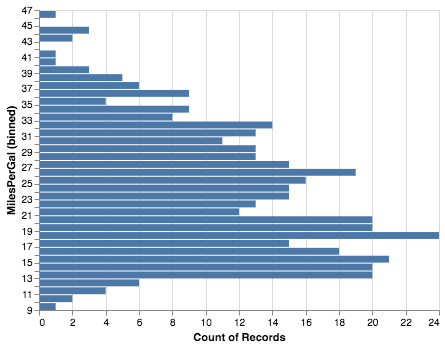

In [84]:
dobj = DataObj(dataset,[Column("MilesPerGal",channel="y")])
print (dobj.compiled)
dobj.singleDisplay()

{'x': Column <MilesPerGal,channel:x,dataType:quantitative,dataModel:measure>, 'y': Column <Origin,channel:y,dataType:categorical,dataModel:dimension>}
{'x': Column <MilesPerGal,channel:x,dataType:quantitative,dataModel:measure>, 'y': Column <Origin,channel:y,dataType:categorical,dataModel:dimension>}
<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:x,dataType:quantitative,dataModel:measure>, Column <Origin,channel:y,dataType:categorical,dataModel:dimension>]>


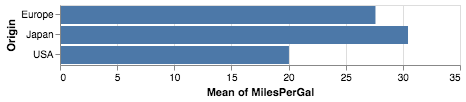

In [96]:
dobj = DataObj(dataset,[Column("MilesPerGal"),Column("Origin")])
print (dobj.compiled)
dobj.singleDisplay()

{'x': Column <Year,channel:x,dataType:date,dataModel:dimension>, 'y': Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>}
{'x': Column <Year,channel:x,dataType:date,dataModel:dimension>, 'y': Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>}
<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <Year,channel:x,dataType:date,dataModel:dimension>, Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>]>


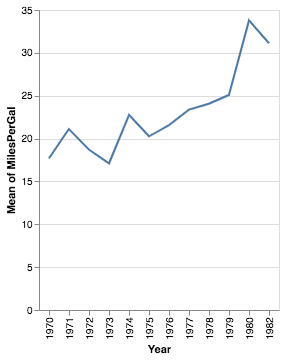

In [95]:
dobj = DataObj(dataset,[Column("MilesPerGal"),Column("Year")])
print (dobj.compiled)
dobj.singleDisplay()

### Debug EnforceChannel

In [109]:
dataset = Dataset("data/cars.csv",schema=[{"Year":{"dataType":"date"}}])
dobj = DataObj(dataset,[Column("MilesPerGal", channel="y",dataModel="measure")])

measure = dobj.getObjByDataModel("measure")[0]
countCol = Column("count()",dataModel="measure")
dobj.spec.append(countCol)

autoChannel = {"x": measure,"y": countCol}
	# assert dobj.compiled.spec[0].channel =="x"

{'x': Column <MilesPerGal,channel:x,dataType:quantitative,dataModel:measure>, 'y': Column <count(),channel:y,dataType:,dataModel:measure>}
y


In [110]:
available_channels = list(autoChannel.keys()) 
print ("available_channels:",available_channels)
print ("autoChannel:",autoChannel)
# create a dictionary of specified channels in the given dobj
specifiedDict = {} # specifiedDict={"x":[],"y":[list of Dobj with y specified as channel]}
# import copy
# specifiedChannel = copy.deepcopy(autoChannel)
specifiedChannel = {}
for val in available_channels:
    specifiedDict[val]= dobj.getObjFromChannel(val)
    specifiedChannel[val] = ""
    #specifiedChannel[val].channel = val # populate initially with the auto-values, will be overridden later if necessary
# for every specified element, swap with channel that originally contained that element in the autoChannel
print ("specifiedDict:",specifiedDict)
for sVal,sAttr in specifiedDict.items():
    if (len(sAttr)==1): #if specified in dobj
        # remove the specified channel from available channels
        if (len(available_channels)>0):
#             print (sVal)
#             available_channels.remove(sVal)
            for i in list(autoChannel.keys()):
                if (autoChannel[i].columnName==sAttr[0].columnName):
                    autoChannel.pop(i)
            sAttr[0].channel=sVal
            specifiedChannel[sVal] = sAttr[0]
#             swapWithChannel = available_channels[0] # pick any
            #if (specifiedChannel[sVal].channel!=sVal):
                #print ("compare:",specifiedChannel[sVal].channel,sVal)
#             specifiedChannel[swapWithChannel].channel = sVal
#             specifiedChannel[sVal].channel = swapWithChannel
            # available_channels.remove(swapWithChannel)
    elif (len(sAttr)>1):
        raise ValueError("There should not be more than one attribute specified in the same channel.")
    # elif (len(sAttr)==0): # if unspecified, then populate the channel value with the showMe default
    # 	specifiedChannel[sVal].channel = sVal
# for the leftover channels that are still available, look up their autoChannel specification and fill it in.
print ("autoChannel:",autoChannel)
print ("specifiedChannel:",specifiedChannel)
leftover_channels = list(filter(lambda x: specifiedChannel[x] =='',specifiedChannel))
for leftover_channel,leftover_encoding in zip(leftover_channels,autoChannel.values()):
    print (leftover_channel)
    leftover_encoding.channel = leftover_channel
    specifiedChannel[leftover_channel] = leftover_encoding
dobj.spec = list(specifiedChannel.values())

available_channels: ['x', 'y']
autoChannel: {'x': Column <MilesPerGal,channel:y,dataType:,dataModel:measure>, 'y': Column <count(),channel:,dataType:,dataModel:measure>}
specifiedDict: {'x': [], 'y': [Column <MilesPerGal,channel:y,dataType:,dataModel:measure>]}
autoChannel: {'y': Column <count(),channel:,dataType:,dataModel:measure>}
specifiedChannel: {'x': '', 'y': Column <MilesPerGal,channel:y,dataType:,dataModel:measure>}
x


In [111]:
dobj.spec

[Column <count(),channel:x,dataType:,dataModel:measure>,
 Column <MilesPerGal,channel:y,dataType:,dataModel:measure>]

In [28]:
specifiedChannel

{'x': Column <MilesPerGal,channel:x,dataType:,dataModel:measure>,
 'y': Column <count(),channel:,dataType:,dataModel:measure>}

In [26]:
autoChannel

{'x': Column <MilesPerGal,channel:x,dataType:,dataModel:measure>,
 'y': Column <count(),channel:,dataType:,dataModel:measure>}

In [25]:
available_channels

['y']

In [119]:
dataset = Dataset("data/cars.csv",schema=[{"Year":{"dataType":"date"}}])
dobj = DataObj(dataset,[Column("Year"),Column("Acceleration"),Column("Origin")])

{'x': Column <Year,channel:,dataType:date,dataModel:dimension>, 'y': Column <Acceleration,channel:,dataType:quantitative,dataModel:measure>}
{'x': Column <Year,channel:,dataType:date,dataModel:dimension>, 'y': Column <Acceleration,channel:,dataType:quantitative,dataModel:measure>, 'color': Column <Origin,channel:,dataType:categorical,dataModel:dimension>}
